# <h1 style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/v1016-c-08_1-ksh6mza3.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=f584d8501c27c5f649bc2cfce50705c0)"><b><span style='color:white'>Import the necessary libraries</span></b> </h1>

In [130]:
!pip install cufflinks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# <h1 style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/v1016-c-08_1-ksh6mza3.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=f584d8501c27c5f649bc2cfce50705c0)"><b><span style='color:white'>Features - Explanation</span></b> </h1>


List of csv's collected to build the main database 

1) pts - number of points scored

2) assists - number of assists made

3) reb - number of rebounds

4) steals - number of steals made

5) blocks - number of blocks made

6) games - number of games played

7) minutes - number of minutes played

8) player - player's name

9) birth_year - year of birth of a player

10) first_seas - first season played

11) last_seas - last season played

12) num_seasons - number of seasons played

13) All NBA 1st team - number of times a player was selected to the All NBA 1st team of the season

14) All NBA 2nd team - number of times a player was selected to the All NBA 2nd team of the season

15) All NBA 3rd team - number of times a player was selected to the All NBA 3rd team of the season

16) All Defense  1st team - number of times a player was selected to the NBA All Defense 1st team of the season

17) All Defense  2nd team - number of times a player was selected to the NBA All Defense 2nd team of the season

18) All Rookie 1st team - number of times a player was selected to the NBA All Rookie 1st team of the season

19) All Rookie 2nd team - number of times a player was selected to the NBA All Rookie 2nd team of the season

20) All ABA 1st team - number of times a player was selected to the All ABA 1st team of the season

21) All ABA 2nd team - number of times a player was selected to the All ABA 2nd team of the season

22) All Star appearances - number of times a player was selected to play in the All Star game

23) MVPs - number of times a player was the Most Valuable Player of a season

24) DPOY - number of times a player was the Defensive Player of the Year 

25) NBA ROY - whether a player was the Rookie of the Year 

26) MIP - whether a player was the Most Improved Player

27) SMOY - number of times a player was the Sixth Man of the Year

28) ABA MVP - number of times a player was the ABA Most Valuable Player

29) ABA ROY - whether a player was the ABA Rookie of the Year

30) Championships - number of championships a player won

31) Finals MVP - number of times a player was the NBA Finals Most Valuable Player

32) Scoring Champ - number of times a player averaged the most points per game in one season

33) NBA Assist Leader - number of times a player averaged the most assists per game in one season

34) NBA Rebounding Leader - number of times a player averaged the most rebounds per game in one season

35) NBA Steal Champ - number of times a player averaged the most steals per game in one season

36) NBA Block Champ - number of times a player averaged the most blocks per game in one season

37) All-Star game MVP - number of times a player was the Most Valuable Player of the All-Star game

38) Conference Finals MVP - number of times a player was the Most Valuable Player of the Conference Finals

39) NBA 75 Team - whether a player is a member of the NBA 75 team

40) ABA All-Time Team - whether a player is a member of the ABA All-Time Team

41) eFG% - effective field goal percentage of a player

42) PER - player efficiency rating

43) hof - whether player is in Hall of Fame


<h1 style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/v1016-c-08_1-ksh6mza3.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=f584d8501c27c5f649bc2cfce50705c0)"><b><span style='color:white'>Load the datasets</span></b> </h1>

In [131]:
player_totals=pd.read_csv('archive-2/Player Totals.csv')
player_season_info=pd.read_csv('archive-2/Player Season Info.csv')
player_career_info=pd.read_csv('archive-2/Player Career Info.csv')
player_award_shares=pd.read_csv('archive-2/Player Award Shares.csv')
all_star=pd.read_csv('archive-2/All-Star Selections.csv')
advanced=pd.read_csv('archive-2/Advanced.csv')
end_of_season=pd.read_csv('archive-2/End of Season Teams.csv')
hof=player_career_info

In [132]:
hof.columns

Index(['player_id', 'player', 'birth_year', 'hof', 'num_seasons', 'first_seas',
       'last_seas'],
      dtype='object')

In [133]:
hof

,player_id,player,birth_year,hof,num_seasons,first_seas,last_seas
0,1,Al Brightman,NaN,False,1,1947,1947
1,2,Al Lujack,NaN,False,1,1947,1947
2,3,Al Negratti,NaN,False,1,1947,1947
3,4,Angelo Musi,NaN,False,3,1947,1949
4,5,Ariel Maughan,1923.0,False,5,1947,1951
...,...,...,...,...,...,...,...
5103,5104,TyTy Washington Jr.,NaN,False,1,2023,2023
5104,5105,Vince Williams Jr.,NaN,False,1,2023,2023
5105,5106,Walker Kessler,NaN,False,1,2023,2023
5106,5107,Wendell Moore Jr.,NaN,False,1,2023,2023


In [134]:
player_totals

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,30458,2023,5025,A.J. Green,NaN,SG,23.0,1,NBA,MIL,...,1.000,6.0,39.0,45.0,22,6.0,0.0,9.0,31,154
1,30459,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,TOT,...,0.250,6.0,15.0,21.0,2,2.0,0.0,3.0,11,56
2,30460,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,MIN,...,NaN,0.0,1.0,1.0,0,0.0,0.0,0.0,1,2
3,30461,2023,5026,A.J. Lawson,NaN,SG,22.0,1,NBA,DAL,...,0.250,6.0,14.0,20.0,2,2.0,0.0,3.0,10,54
4,30462,2023,4219,Aaron Gordon,NaN,PF,27.0,9,NBA,DEN,...,0.608,164.0,282.0,446.0,203,54.0,51.0,98.0,129,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31130,200,1947,157,Walt Miller,NaN,F,31.0,1,BAA,PIT,...,0.500,NaN,NaN,NaN,6,NaN,NaN,NaN,16,23
31131,201,1947,158,Warren Fenley,NaN,F,24.0,1,BAA,BOS,...,0.511,NaN,NaN,NaN,16,NaN,NaN,NaN,59,85
31132,202,1947,159,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,...,0.534,NaN,NaN,NaN,37,NaN,NaN,NaN,114,253
31133,203,1947,160,Woody Grimshaw,NaN,G,27.0,1,BAA,PRO,...,0.477,NaN,NaN,NaN,1,NaN,NaN,NaN,25,61


In [135]:
player_totals.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

<h1 style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/v1016-c-08_1-ksh6mza3.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=f584d8501c27c5f649bc2cfce50705c0)"><b><span style='color:white'>Feature engineering, joining extra data to the hof df</span></b> </h1>

In [136]:
list=hof['player']

points=[]
assists=[]
reb=[]
blocks=[]
steals=[]
games=[]
minutes=[]

for i in list:
    points.append(player_totals[player_totals['player']==i].sum()['pts'])
    assists.append(player_totals[player_totals['player']==i].sum()['ast'])
    reb.append(player_totals[player_totals['player']==i].sum()['trb'])
    blocks.append(player_totals[player_totals['player']==i].sum()['blk'])
    steals.append(player_totals[player_totals['player']==i].sum()['stl'])
    games.append(player_totals[player_totals['player']==i].sum()['g'])
    minutes.append(player_totals[player_totals['player']==i].sum()['mp'])
    
hof['points']=points
hof['assists']=assists    
hof['reb']=reb
hof['blocks']=blocks
hof['steals']=steals
hof['games']=games
hof['minutes']=minutes

In [137]:
all_nba_1st_team = []  # Create an empty list to store All-NBA 1st team counts

for player in list:
    a = end_of_season[(end_of_season['type'] == 'All-NBA') & (end_of_season['player'] == player)]
    
    if a.empty:
        x = 0 
    elif a['number_tm'].value_counts().count() == 3:
        x = a['number_tm'].value_counts()['1st']  
    elif a['number_tm'].value_counts().count() == 2:
        if ('1st' in a['number_tm'].value_counts().index[0:2]):
            x = a['number_tm'].value_counts()['1st']  
        else:
            x = 0  
    else:
        if a['number_tm'].value_counts().index[0] != '1st':
            x = 0 
        else:
            x = a['number_tm'].value_counts()['1st'] 
            
    all_nba_1st_team.append(x)
    
hof['All NBA 1st team'] = all_nba_1st_team  


In [138]:
all_nba_2nd_team = []  # Create an empty list to store All-NBA 2nd team counts

for player in list:
    a = end_of_season[(end_of_season['type'] == 'All-NBA') & (end_of_season['player'] == player)]

    if a.empty:
        x = 0
    elif a['number_tm'].value_counts().count() == 3:
        x = a['number_tm'].value_counts()['2nd']
    elif a['number_tm'].value_counts().count() == 2:
        if ('2nd' in a['number_tm'].value_counts().index[0:2]):
            x = a['number_tm'].value_counts()['2nd']
        else:
            x = 0
    else:
        if a['number_tm'].value_counts().index[0] != '2nd':
            x = 0
        else:
            x = a['number_tm'].value_counts()['2nd']

    all_nba_2nd_team.append(x)
    
hof['All NBA 2nd team'] = all_nba_2nd_team

In [139]:
all_nba_3rd_team = []  # Create an empty list to store All-NBA 3rd team counts

for player in list:
    a = end_of_season[(end_of_season['type'] == 'All-NBA') & (end_of_season['player'] == player)]

    if a.empty:
        x = 0
    elif a['number_tm'].value_counts().count() == 3:
        x = a['number_tm'].value_counts()['3rd']
    elif a['number_tm'].value_counts().count() == 2:
        if ('3rd' in a['number_tm'].value_counts().index[0:2]):
            x = a['number_tm'].value_counts()['3rd']
        else:
            x = 0
    else:
        if a['number_tm'].value_counts().index[0] != '3rd':
            x = 0
        else:
            x = a['number_tm'].value_counts()['3rd']

    all_nba_3rd_team.append(x)
    
hof['All NBA 3rd team'] = all_nba_3rd_team


In [140]:
allnbadef = []

for i in list:
    a = end_of_season[(end_of_season['type'] == 'All-Defense') & (end_of_season['player'] == i)]
    
    x = 0
    if a.empty:
        x = 0
    elif a['number_tm'].value_counts().count() == 2:
        x = a['number_tm'].value_counts()['1st']
    elif a['number_tm'].value_counts().index[0] != '1st':
        x = 0
    else:
        x = a['number_tm'].value_counts()['1st']
    
    allnbadef.append(x)

hof['All Defense 1st team'] = allnbadef

In [141]:
allnbadef2 = []

for i in list:
    a = end_of_season[(end_of_season['type'] == 'All-Defense') & (end_of_season['player'] == i)]
    
    x = 0
    if a.empty:
        x = 0
    elif a['number_tm'].value_counts().count() == 2:
        x = a['number_tm'].value_counts()['2nd']
    elif a['number_tm'].value_counts().index[0] != '2nd':
        x = 0
    else:
        x = a['number_tm'].value_counts()['2nd']
    
    allnbadef2.append(x)

hof['All Defense 2nd team'] = allnbadef2


In [142]:
allrookies = []

for i in list:
    a = end_of_season[(end_of_season['type'] == 'All-Rookie') & (end_of_season['player'] == i)]
    
    x = 0
    if a.empty:
        x = 0
    elif a['number_tm'].value_counts().count() == 2:
        x = a['number_tm'].value_counts()['1st']
    elif a['number_tm'].value_counts().index[0] != '1st':
        x = 0
    else:
        x = a['number_tm'].value_counts()['1st']
    
    allrookies.append(x)

hof['All Rookies 1st team'] = allrookies

In [143]:
allrookies2 = []

for i in list:
    a = end_of_season[(end_of_season['type'] == 'All-Rookie') & (end_of_season['player'] == i)]
    
    x = 0
    if a.empty:
        x = 0
    elif a['number_tm'].value_counts().count() == 2:
        x = a['number_tm'].value_counts()['2nd']
    elif a['number_tm'].value_counts().index[0] != '2nd':
        x = 0
    else:
        x = a['number_tm'].value_counts()['2nd']
    
    allrookies2.append(x)

hof['All Rookies 2nd team'] = allrookies2

In [144]:
allABA = []

for i in list:
    a = end_of_season[(end_of_season['type'] == 'All-ABA') & (end_of_season['player'] == i)]
    
    x = 0
    if a.empty:
        x = 0
    elif a['number_tm'].value_counts().count() == 2:
        x = a['number_tm'].value_counts()['1st']
    elif a['number_tm'].value_counts().index[0] != '1st':
        x = 0
    else:
        x = a['number_tm'].value_counts()['1st']
    
    allABA.append(x)

hof['All ABA 1st team'] = allABA

In [145]:
allABA2 = []

for i in list:
    a = end_of_season[(end_of_season['type'] == 'All-ABA') & (end_of_season['player'] == i)]
    
    x = 0
    if a.empty:
        x = 0
    elif a['number_tm'].value_counts().count() == 2:
        x = a['number_tm'].value_counts()['2nd']
    elif a['number_tm'].value_counts().index[0] != '2nd':
        x = 0
    else:
        x = a['number_tm'].value_counts()['2nd']
    
    allABA2.append(x)

hof['All ABA 2nd team'] = allABA2

In [146]:
allstar = []

for i in list:
    a = all_star[all_star['player'] == i]
    
    if a.empty:
        x = 0     
    else:
        x = a['replaced'].count()
            
    allstar.append(x)    
    

hof['All Star appearances'] = allstar


In [147]:
mvp = []

for i in list:
    a=player_award_shares[(player_award_shares['award']=='nba mvp') & (player_award_shares['player']==i)]
    
    if a.empty:
        x = 0     
    else:
        x = sum(a['winner'])
            
    mvp.append(x)    

hof['MVPs']= mvp   

In [148]:
dpoy = []

for i in list:
    a=player_award_shares[(player_award_shares['award']=='dpoy')&(player_award_shares['player']==i)]
    
    if a.empty:
        x=0     
    else:
        x=sum(a['winner'])
            
    dpoy.append(x)    

hof['DPOY']= dpoy        

In [149]:
nba_roy = []

for i in list:
    a=player_award_shares[(player_award_shares['award']=='nba roy') & (player_award_shares['player']==i)]
    
    if a.empty:
        x = 0     
    else:
        x = sum(a['winner'])
            
    nba_roy.append(x)    

hof['NBA ROY']= nba_roy     

In [150]:
mip = []

for i in list:
    a = player_award_shares[(player_award_shares['award']=='mip') & (player_award_shares['player']==i)]
    
    if a.empty:
        x = 0     
    else:
        x = sum(a['winner'])
            
    mip.append(x)    

hof['MIP'] = mip  

In [151]:
smoy = []
for i in list:
    a = player_award_shares[(player_award_shares['award']=='smoy') & (player_award_shares['player']==i)]
    
    if a.empty:
        x = 0     
    else:
        x = sum(a['winner'])
            
    smoy.append(x)    

hof['SMOY'] = smoy  

In [152]:
aba_mvp = []

for i in list:
    a = player_award_shares[(player_award_shares['award']=='aba mvp') & (player_award_shares['player']==i)]
    
    if a.empty:
        x = 0     
    else:
        x = sum(a['winner'])
            
    aba_mvp.append(x)    

hof['ABA MVP'] = aba_mvp

In [153]:
aba_rook = []

for i in list:
    
    a = player_award_shares[(player_award_shares['award']=='aba roy') & (player_award_shares['player']==i)]
    
    if a.empty:
        x=0     
    else:
        x=sum(a['winner'])
            
    aba_rook.append(x)   
    
hof['ABA ROY'] = aba_rook   

<h1 style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/v1016-c-08_1-ksh6mza3.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=f584d8501c27c5f649bc2cfce50705c0)"><b><span style='color:white'>Looking for some extra info... :)</span></b> </h1>

In [154]:
clean = pd.read_csv('NBA_players_clean.csv')
clean.columns

Index(['Player', 'From', 'To', 'Years', 'Pos', 'Ht', 'Height', 'Wt', 'G',
       'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS',
       'All Star', 'All NBA', 'All ABA', 'All Rookie', 'All Defensive',
       'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 'Scoring Champ',
       'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 'CF MVP',
       'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team',
       'ABA All-Time Team'],
      dtype='object')

In [155]:
clean['Player']

0             Alaa Abdelnaby
1            Zaid Abdul-Aziz
2       Kareem Abdul-Jabbar*
3         Mahmoud Abdul-Rauf
4          Tariq Abdul-Wahad
                ...         
5018              Ante Žižić
5019                Jim Zoet
5020               Bill Zopf
5021             Ivica Zubac
5022              Matt Zunic
Name: Player, Length: 5023, dtype: object

As we can see, some players have asterisks after their name.

In [156]:
def cut_string(str):
    if '*' in str:
        return str.split('*')[0]
    else:
        return str
    
clean['player'] = clean['Player'].apply(lambda x:cut_string(x))

In [157]:
list=hof['player']
list5=clean['player']

In [158]:
rings_list = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['Championships']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    rings_list.append(x)    
            
hof['Championships'] = rings_list

In [159]:
fmvp = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['Finals MVP']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    fmvp.append(x)    
            
hof['Finals MVP'] = fmvp

In [160]:
scorer = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['Scoring Champ']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    scorer.append(x) 
    
hof['Scoring Champ']=scorer

In [161]:
asstchmp = []

for i in list:
    for j in list5:
        
        if j==i:
            a = clean[clean['player']==j]['AST Champ']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    asstchmp.append(x)    

hof['NBA Assist Leader'] = asstchmp

In [162]:
rebchmp = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['TRB Champ']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    rebchmp.append(x)  
    
hof['NBA Rebounding Leader']=rebchmp 

In [163]:
stlchmp = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['STL Champ']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    stlchmp.append(x)    
            
hof['NBA Steal Champ'] = stlchmp 

In [164]:
blkchmp = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['BLK Champ']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    blkchmp.append(x)    

hof['NBA Block Champ']=blkchmp     

In [165]:
asmvp = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['AS MVP']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    asmvp.append(x) 
    
hof['All-Star game MVP']=asmvp 

In [166]:
cfmvp = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['CF MVP']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    cfmvp.append(x)    
            
hof['Conference Finals MVP'] = cfmvp     
        

In [167]:
nba75 = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['NBA 75 Team']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    nba75.append(x)    
            
hof['NBA 75 Team'] = nba75

In [168]:
abaaltime = []

for i in list:
    for j in list5:
        
        if j==i:
            a = clean[clean['player']==j]['ABA All-Time Team']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    abaaltime.append(x)
    
hof['ABA All-Time Team'] = abaaltime  

In [169]:
efg = []

for i in list:
    for j in list5:
        
        if j==i:
            a = clean[clean['player']==j]['eFG%']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    efg.append(x) 
    
hof['eFG%'] = efg  

In [170]:
per = []

for i in list:
    for j in list5:
        
        if j == i:
            a = clean[clean['player']==j]['PER']
            if a.empty:
                x = 0
            else:
                x = a.iloc[0]
        
    per.append(x)    

hof['PER']=per 

<h1 style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/v1016-c-08_1-ksh6mza3.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=f584d8501c27c5f649bc2cfce50705c0)"><b><span style='color:white'>Let's see how it's going... :)</span></b> </h1>

In [171]:
hof.head()

,player_id,player,birth_year,hof,num_seasons,first_seas,last_seas,points,assists,reb,...,NBA Assist Leader,NBA Rebounding Leader,NBA Steal Champ,NBA Block Champ,All-Star game MVP,Conference Finals MVP,NBA 75 Team,ABA All-Time Team,eFG%,PER
0,1,Al Brightman,NaN,False,1,1947,1947,567,60,0.0,...,0,0,0,0,0,0,0,0,45.3,10.9
1,2,Al Lujack,NaN,False,1,1947,1947,4,0,0.0,...,0,0,0,0,0,0,0,0,45.3,10.9
2,3,Al Negratti,NaN,False,1,1947,1947,31,5,0.0,...,0,0,0,0,0,0,0,0,48.4,13.6
3,4,Angelo Musi,NaN,False,3,1947,1949,1359,117,0.0,...,0,0,0,0,0,0,0,0,44.1,10.3
4,5,Ariel Maughan,1923.0,False,5,1947,1951,2227,317,141.0,...,0,0,0,0,0,0,0,0,45.3,10.9


In [172]:
hof.columns

Index(['player_id', 'player', 'birth_year', 'hof', 'num_seasons', 'first_seas',
       'last_seas', 'points', 'assists', 'reb', 'blocks', 'steals', 'games',
       'minutes', 'All NBA 1st team', 'All NBA 2nd team', 'All NBA 3rd team',
       'All Defense 1st team', 'All Defense 2nd team', 'All Rookies 1st team',
       'All Rookies 2nd team', 'All ABA 1st team', 'All ABA 2nd team',
       'All Star appearances', 'MVPs', 'DPOY', 'NBA ROY', 'MIP', 'SMOY',
       'ABA MVP', 'ABA ROY', 'Championships', 'Finals MVP', 'Scoring Champ',
       'NBA Assist Leader', 'NBA Rebounding Leader', 'NBA Steal Champ',
       'NBA Block Champ', 'All-Star game MVP', 'Conference Finals MVP',
       'NBA 75 Team', 'ABA All-Time Team', 'eFG%', 'PER'],
      dtype='object')

In [173]:
hof['hof'] = hof['hof'].astype(int) #convert false true to 0 & 1

In [174]:
hof['MIP'] = hof['MIP'].fillna(0)
hof['SMOY'] = hof['SMOY'].fillna(0)

#Filling some null values...

In [175]:
hof[hof['player']=='Patrick Ewing']['first_seas'].size
hof.drop(3966,inplace=True)

#we drop a duplicate column of PEwing, which was incorrect

<h1 style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/v1016-c-08_1-ksh6mza3.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=f584d8501c27c5f649bc2cfce50705c0)"><b><span style='color:white'>Let's go for some visualizations!!</span></b> </h1>

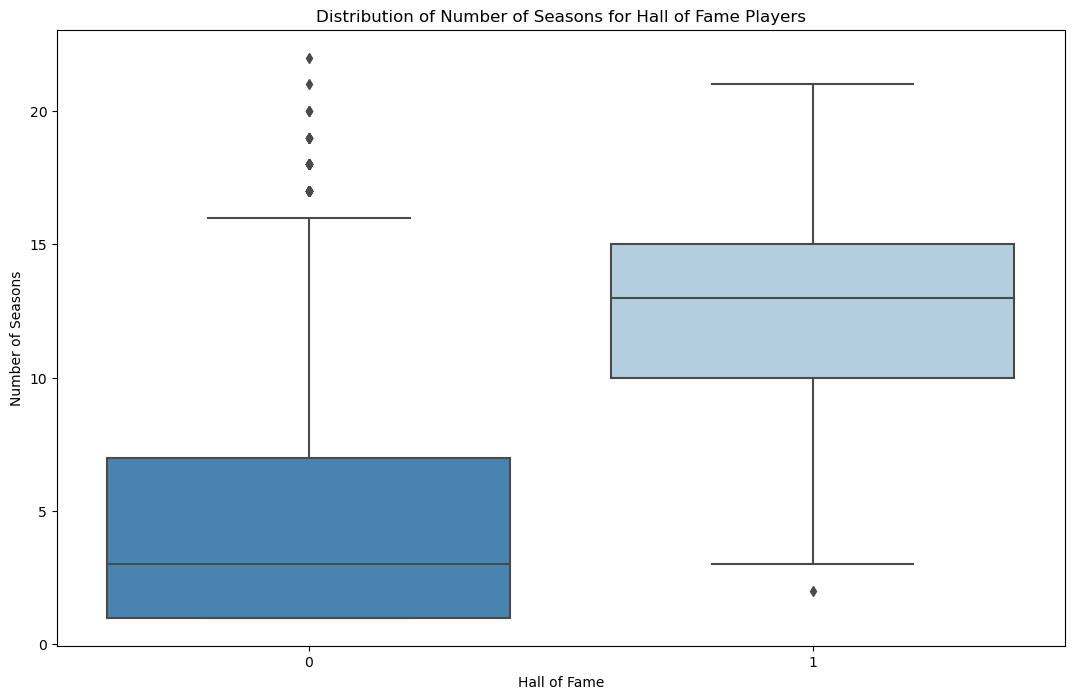

In [176]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.boxplot(x='hof', y='num_seasons', data=hof, palette='Blues_r')

ax.set_xlabel('Hall of Fame')
ax.set_ylabel('Number of Seasons')
ax.set_title('Distribution of Number of Seasons for Hall of Fame Players')

plt.show()


Looks like almost all Hall of Famers have at least 10 seasons played

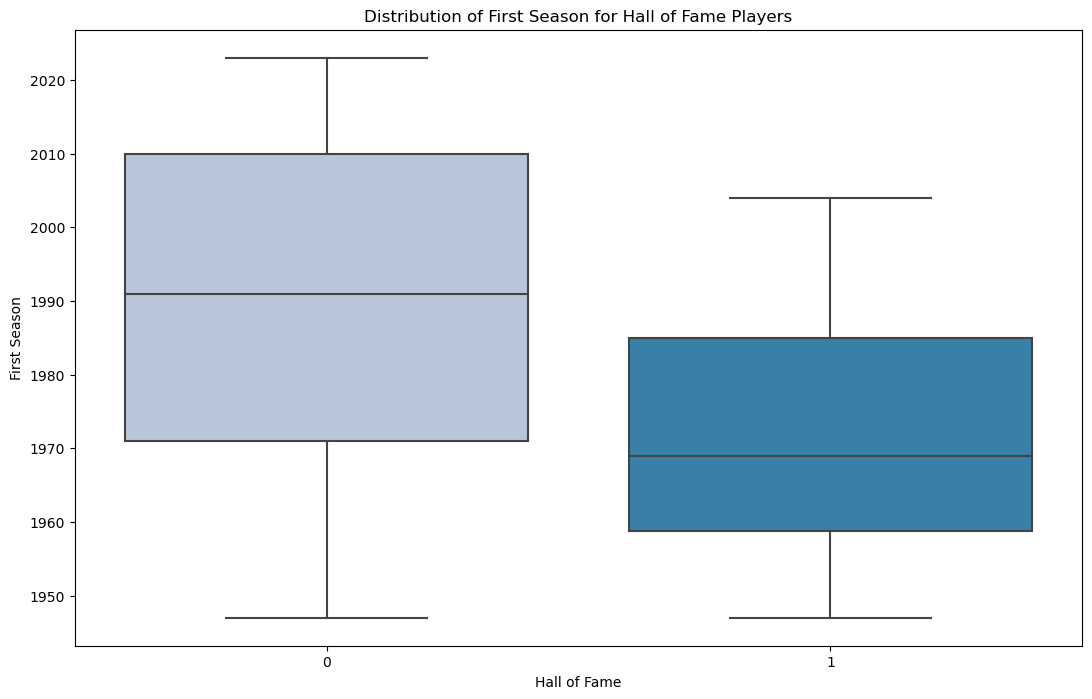

In [177]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.boxplot(x='hof', y='first_seas', data=hof, palette='PuBu')


ax.set_xlabel('Hall of Fame')
ax.set_ylabel('First Season')
ax.set_title('Distribution of First Season for Hall of Fame Players')

plt.show()


It is notable that a significant majority of Hall of Famers commenced their careers prior to 1990. This pattern can be attributed to the fact that induction into the Hall of Fame does not occur immediately following a player's retirement but rather after a certain number of years. This waiting period allows for a comprehensive evaluation of a player's career, ensuring that their impact on the game is thoroughly assessed.

Consequently, many players who are currently active or have recently retired are not yet included in the Hall of Fame. Since they are still in the early stages of their eligibility period, they have not had sufficient time for their careers to be fully evaluated against the established criteria.


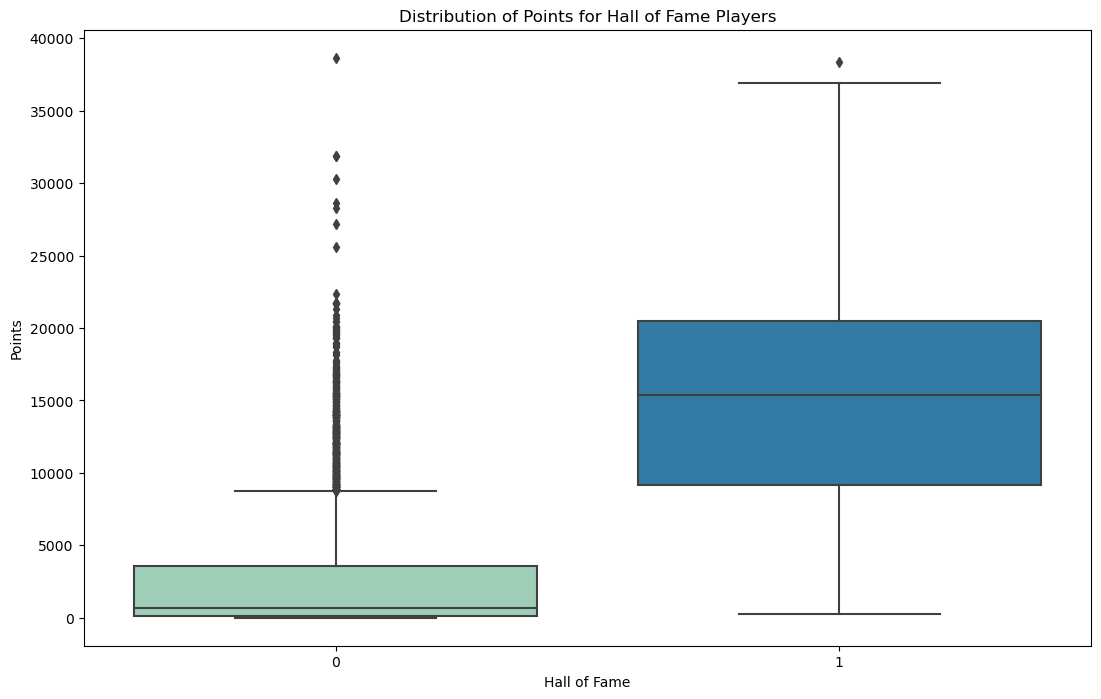

In [178]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.boxplot(x='hof', y='points', data=hof, palette='YlGnBu')
ax.set_xlabel('Hall of Fame')
ax.set_ylabel('Points')
ax.set_title('Distribution of Points for Hall of Fame Players')

plt.show()


In [179]:
correlation_points = hof['hof'].corr(hof['points'])
correlation_assists = hof['hof'].corr(hof['assists'])
correlation_rebounds = hof['hof'].corr(hof['reb'])
correlation_blocks = hof['hof'].corr(hof['blocks'])
correlation_steals = hof['hof'].corr(hof['steals'])

print("Correlation coefficient between points and HOF:", correlation_points)
print("Correlation coefficient between assists and HOF:", correlation_assists)
print("Correlation coefficient between rebounds and HOF:", correlation_rebounds)
print("Correlation coefficient between blocks and HOF:", correlation_blocks)
print("Correlation coefficient between steals and HOF:", correlation_steals)


Correlation coefficient between points and HOF: 0.4698676207142851
Correlation coefficient between assists and HOF: 0.3908999887172298
Correlation coefficient between rebounds and HOF: 0.4297075070728897
Correlation coefficient between blocks and HOF: 0.23773371737867502
Correlation coefficient between steals and HOF: 0.24641503754459088


<Axes: >

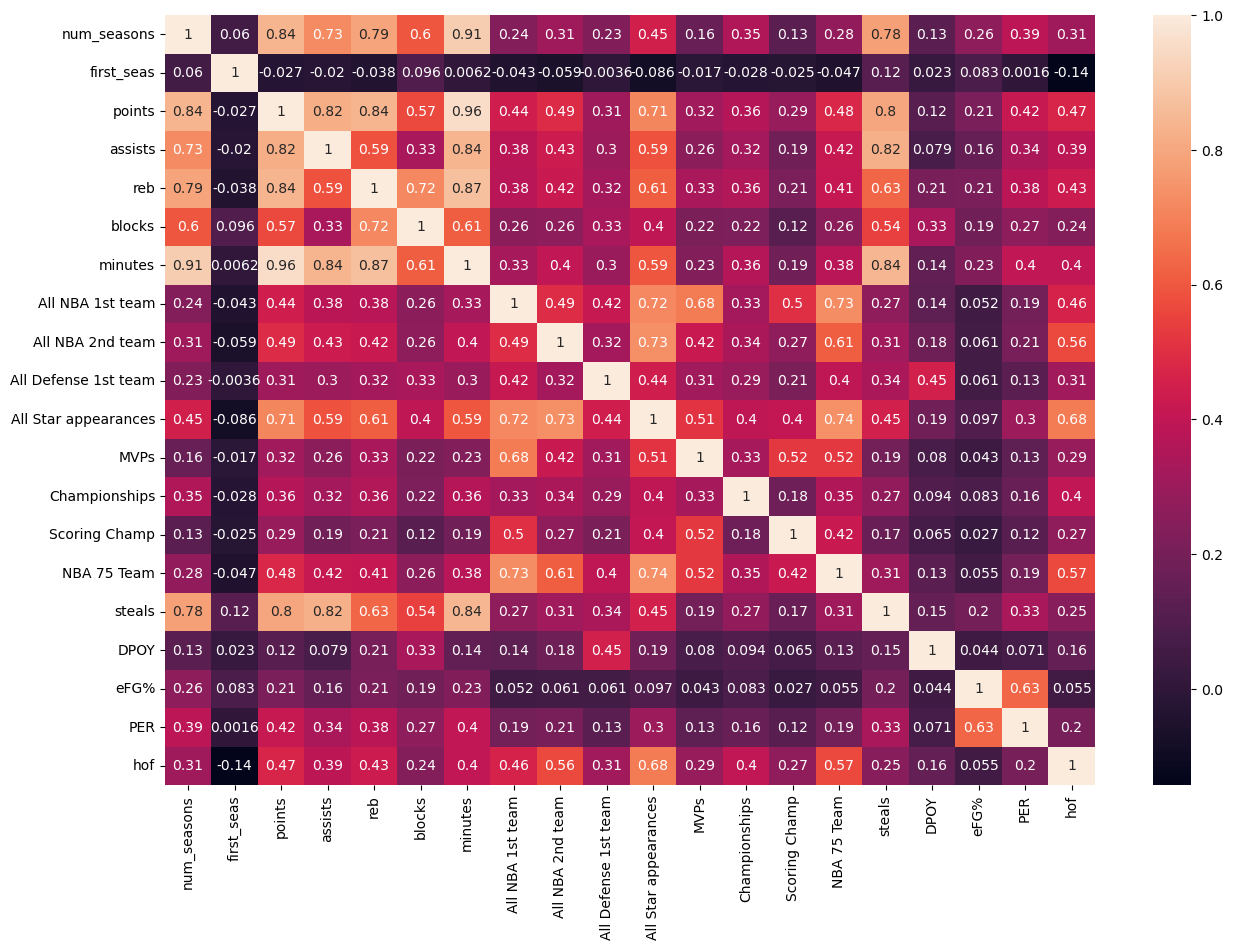

In [180]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hof[['num_seasons','first_seas','points','assists','reb','blocks','minutes','All NBA 1st team','All NBA 2nd team',
                'All Defense 1st team','All Star appearances','MVPs','Championships','Scoring Champ',
                 'NBA 75 Team','steals','DPOY','eFG%','PER','hof']].corr(),annot=True)

In [232]:
import plotly.express as px

fig = px.scatter(
    hof, x="points", y="eFG%", color='hof',
    hover_data=['player']
)

fig.update_layout(title="Scatter Plot of Points vs. eFG%", xaxis_title="Points", yaxis_title="eFG%")

fig.show()


In [233]:
# Filter the data for players with more than 30000 points
filtered_data = hof[hof['points'] > 28000]

fig = px.scatter(
    filtered_data, x="points", y="eFG%", color='hof',
    hover_data=['player'], text='player'
)

fig.update_layout(
    title="Scatter Plot of Points vs. eFG% for Players with >30000 Points",
    xaxis_title="Points",
    yaxis_title="eFG%"
)

fig.update_traces(textposition='top center')

fig.show()



In [184]:
filtered_data = hof[hof['assists'] > 8500]
hof['color'] = hof['hof'].map({0: 'blue', 1: 'red'})

fig = px.scatter(
    filtered_data, x="points", y="assists", color='color',
    hover_data=['player'], text='player')

fig.update_traces(textposition='top center')

fig.show()


Now let's do machine learning and predictions. I am going to separate the dataset, players that started their careers before 2000s will be in the training data slice. That way we will see which current players our model will have as Hall of Famers based on their career achievements.

In [185]:
# Splitting the data into training and test sets
young = hof[hof['first_seas'] > 2000]
old = hof[hof['first_seas'] < 2000]

# Training data
X_train = old.drop(['birth_year', 'player_id', 'first_seas', 'last_seas', 'hof', 'player', 'color'], axis=1)
y_train = old['hof']

# Test data
X_test = young.drop(['birth_year', 'player_id', 'first_seas', 'last_seas', 'hof', 'player', 'color'], axis=1)
y_test = young['hof']


In [186]:
X_train

,num_seasons,points,assists,reb,blocks,steals,games,minutes,All NBA 1st team,All NBA 2nd team,...,NBA Assist Leader,NBA Rebounding Leader,NBA Steal Champ,NBA Block Champ,All-Star game MVP,Conference Finals MVP,NBA 75 Team,ABA All-Time Team,eFG%,PER
0,1,567,60,0.0,0.0,0.0,58,0.0,0,0,...,0,0,0,0,0,0,0,0,45.3,10.9
1,1,4,0,0.0,0.0,0.0,5,0.0,0,0,...,0,0,0,0,0,0,0,0,45.3,10.9
2,1,31,5,0.0,0.0,0.0,11,0.0,0,0,...,0,0,0,0,0,0,0,0,48.4,13.6
3,3,1359,117,0.0,0.0,0.0,161,0.0,0,0,...,0,0,0,0,0,0,0,0,44.1,10.3
4,5,2227,317,141.0,0.0,0.0,301,0.0,0,0,...,0,0,0,0,0,0,0,0,45.3,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,4,2943,446,1114.0,113.0,315.0,317,8215.0,0,0,...,0,0,0,0,0,0,0,0,44.6,12.7
3163,11,5970,2183,1192.0,11.0,338.0,718,15828.0,0,0,...,0,0,0,0,0,0,0,0,49.4,13.2
3164,1,4,2,0.0,0.0,0.0,1,3.0,0,0,...,0,0,0,0,0,0,0,0,150.0,76.1
3165,22,28636,5187,7282.0,956.0,1706.0,1691,51246.0,0,1,...,0,0,0,0,0,0,0,0,48.9,18.6


In [187]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
3162    0
3163    0
3164    0
3165    0
3166    0
Name: hof, Length: 3167, dtype: int64

In [188]:
# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)[:, 0-1]

# Logistic Regression
logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(X_train, y_train)
pred_log = logmodel.predict(X_test)
log_prob = logmodel.predict_proba(X_test)[:, 0-1]

# Random Forest
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)[:, 0-1]

# Print results
print('=== Logistic Regression ===')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred_log)}")
print(f"\nClassification Report:\n{classification_report(y_test, pred_log)}")

print('\n=== Random Forest ===')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred_rfc)}")
print(f"\nClassification Report:\n{classification_report(y_test, pred_rfc)}")

print('\n=== K Nearest Neighbors ===')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred_knn)}")
print(f"\nClassification Report:\n{classification_report(y_test, pred_knn)}")

=== Logistic Regression ===
Confusion Matrix:
[[1841   33]
 [   0    6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1874
           1       0.15      1.00      0.27         6

    accuracy                           0.98      1880
   macro avg       0.58      0.99      0.63      1880
weighted avg       1.00      0.98      0.99      1880


=== Random Forest ===
Confusion Matrix:
[[1844   30]
 [   1    5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1874
           1       0.14      0.83      0.24         6

    accuracy                           0.98      1880
   macro avg       0.57      0.91      0.62      1880
weighted avg       1.00      0.98      0.99      1880


=== K Nearest Neighbors ===
Confusion Matrix:
[[1834   40]
 [   5    1]]

Classification Report:
              precision    recall  f1-score   support

    

In [189]:
res=pd.concat([X_test,y_test],axis=1)

res['log_pred']=pred_log
res['log_prob']=log_prob

res['rfc_pred']=pred_rfc
res['rfc_prob']=rfc_prob

res['knn_pred']=pred_knn
res['knn_prob']=knn_prob

res_final=pd.concat([res,hof['player']],axis=1)

In [190]:
res_final[(res_final['hof']==0)&((res_final['log_pred']==1)|(res_final['knn_pred']==1)|(res_final['rfc_pred']==1))].head(60)

,num_seasons,points,assists,reb,blocks,steals,games,minutes,All NBA 1st team,All NBA 2nd team,...,eFG%,PER,hof,log_pred,log_prob,rfc_pred,rfc_prob,knn_pred,knn_prob,player
3316,11.0,12157.0,3183.0,2357.0,155.0,958.0,622.0,21147.0,0.0,1.0,...,48.2,19.6,0.0,0.0,0.122518,0.0,0.125,1.0,1.0,Gilbert Arenas
3326,18.0,22352.0,5581.0,5780.0,291.0,1209.0,1490.0,50060.0,0.0,0.0,...,49.7,15.4,0.0,0.0,0.239156,1.0,0.535,1.0,1.0,Joe Johnson
3365,14.0,16674.0,1095.0,6961.0,1092.0,665.0,905.0,27499.0,1.0,4.0,...,53.8,21.8,0.0,1.0,0.720139,1.0,0.725,0.0,0.0,Amar'e Stoudemire
3395,3.0,733.0,428.0,381.0,25.0,126.0,140.0,3096.0,0.0,0.0,...,38.4,7.1,0.0,0.0,0.007230,0.0,0.015,1.0,1.0,Junior Harrington
3434,19.0,30259.0,3643.0,8371.0,690.0,1291.0,1337.0,46265.0,0.0,2.0,...,48.5,19.5,0.0,1.0,0.989717,1.0,0.855,1.0,1.0,Carmelo Anthony
3462,20.0,38652.0,10420.0,10667.0,1073.0,2186.0,1421.0,54093.0,13.0,3.0,...,54.5,27.3,0.0,1.0,1.000000,1.0,0.980,1.0,1.0,LeBron James
3519,18.0,19485.0,1676.0,14627.0,2228.0,1081.0,1242.0,39457.0,5.0,1.0,...,58.8,21.3,0.0,1.0,0.997686,1.0,0.860,0.0,0.0,Dwight Howard
3584,18.0,21755.0,11501.0,5457.0,194.0,2544.0,1214.0,41785.0,4.0,5.0,...,52.3,24.6,0.0,1.0,0.999997,1.0,0.990,0.0,0.0,Chris Paul
3618,17.0,17763.0,4253.0,2824.0,218.0,1079.0,1270.0,30521.0,0.0,0.0,...,47.9,18.0,0.0,0.0,0.015780,0.0,0.090,1.0,1.0,Lou Williams
3622,1.0,0.0,0.0,4.0,0.0,2.0,6.0,9.0,0.0,0.0,...,0.0,15.5,0.0,1.0,0.746906,0.0,0.000,0.0,0.0,Martynas Andriuškevičius


It's evident from the results that the Logistic Regression and Random Forest models provided more realistic predictions compared to the K Nearest Neighbors (KNN) model. The KNN model misclassified players such as Enes Freedom and Eric Bledsoe as potential Hall of Famers, which seems inaccurate. Furthermore, the KNN model failed to classify any of the three players who have already been inducted into the Hall of Fame. This highlights the limitations of the KNN model in this particular classification task.

In [216]:
res_final_summary = res_final[['player', 'log_prob', 'rfc_prob', 'hof']]
res_final_summary

,player,log_prob,rfc_prob,hof
3227,A.J. Guyton,0.004579,0.000,0.0
3228,Andy Panko,0.001827,0.000,0.0
3229,Art Long,0.003667,0.000,0.0
3230,Brian Cardinal,0.010489,0.000,0.0
3231,Chris Mihm,0.004624,0.005,0.0
...,...,...,...,...
3222,Trajan Langdon,NaN,NaN,NaN
3223,Vonteego Cummings,NaN,NaN,NaN
3224,Wally Szczerbiak,NaN,NaN,NaN
3225,Wayne Turner,NaN,NaN,NaN


In [231]:
res_final[res_final['player'] == 'Nikola Jokić']


,num_seasons,points,assists,reb,blocks,steals,games,minutes,All NBA 1st team,All NBA 2nd team,...,eFG%,PER,hof,log_pred,log_prob,rfc_pred,rfc_prob,knn_pred,knn_prob,player
4351,8.0,12054.0,3959.0,6273.0,423.0,714.0,596.0,18341.0,3.0,1.0,...,57.9,27.1,0.0,1.0,0.800802,1.0,0.715,1.0,1.0,Nikola Jokić


In [227]:
sorted_df = res_final_summary[(res_final_summary['rfc_prob'] > 0.5) & (res_final_summary['hof'] == 0)]
sorted_df = sorted_df.sort_values('rfc_prob', ascending=False)
sorted_df = sorted_df[['player', 'rfc_prob']]

sorted_df


,player,rfc_prob
3769,Kevin Durant,1.000
3848,Russell Westbrook,0.990
3584,Chris Paul,0.990
3462,LeBron James,0.980
3902,Stephen Curry,0.975
3879,James Harden,0.940
4163,Giannis Antetokounmpo,0.920
4065,Anthony Davis,0.900
4031,Kawhi Leonard,0.875
3519,Dwight Howard,0.860
